In [229]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
from importlib.metadata import version
import cv2
import pixellib

print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


(1080, 1080, 3)
(1440, 1080, 3)
(1440, 1080, 3)
(773, 773, 3)


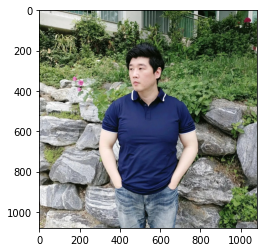

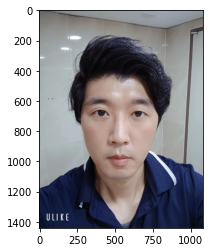

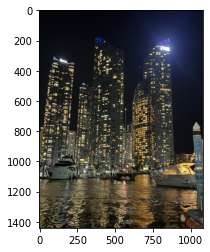

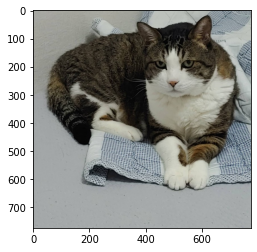

In [230]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png' 
img_path_2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image_2.png'
img_path_3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image_3.png'
img_path_4 = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image_4.png'

img_orig = cv2.imread(img_path)
img_orig_2 = cv2.imread(img_path_2)
img_orig_3 = cv2.imread(img_path_3)
img_orig_3 = cv2.resize(img_orig_3, dsize=(1080, 1440), interpolation=cv2.INTER_CUBIC)
img_orig_4 = cv2.imread(img_path_4)

print(img_orig.shape)
print(img_orig_2.shape)
print(img_orig_3.shape)
print(img_orig_4.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig_2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig_3, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig_4, cv2.COLOR_BGR2RGB))
plt.show()

In [231]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url ='https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f142d20ff40>)

In [232]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [233]:
segvalues, output = model.segmentAsPascalvoc(img_path)
segvalues_2, output_2 = model.segmentAsPascalvoc(img_path_2)
segvalues_3, output_3 = model.segmentAsPascalvoc(img_path_2)
segvalues_4, output_4 = model.segmentAsPascalvoc(img_path_4)

In [234]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

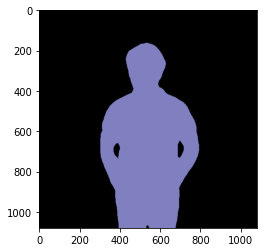

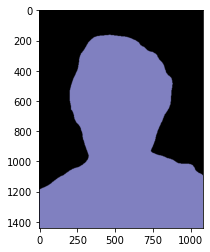

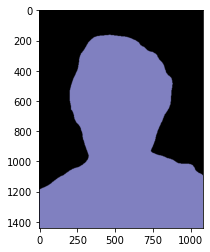

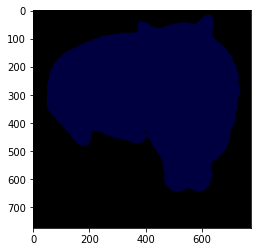

In [235]:
plt.imshow(output)
plt.show()
plt.imshow(output_2)
plt.show()
plt.imshow(output_3)
plt.show()
plt.imshow(output_4)
plt.show()

In [236]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [237]:
segvalues_2

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])}

In [238]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [239]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [240]:
colormap[15]

array([192, 128, 128])

In [241]:
seg_color = (128,128,192)
seg_color_2 = (0,0,64)

(1080, 1080)
(1440, 1080)


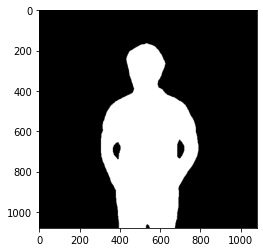

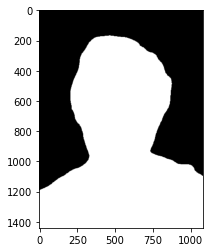

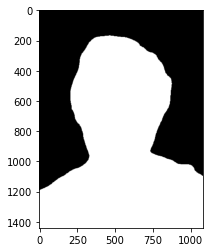

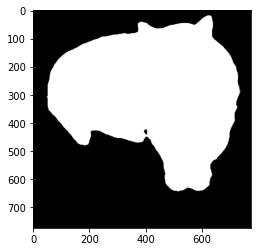

In [242]:
seg_map = np.all(output==seg_color, axis=-1)
seg_map_2 = np.all(output_2==seg_color, axis=-1)
seg_map_3 = np.all(output_2==seg_color, axis=-1)
seg_map_4 = np.all(output_4==seg_color_2, axis=-1)
print(seg_map.shape)
print(seg_map_2.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()
plt.imshow(seg_map_2, cmap='gray')
plt.show()
plt.imshow(seg_map_3, cmap='gray')
plt.show()
plt.imshow(seg_map_4, cmap='gray')
plt.show()

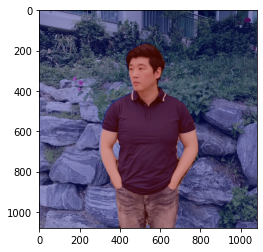

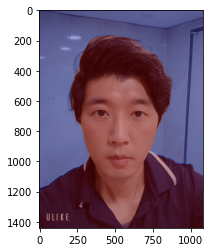

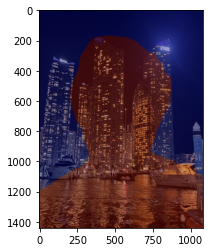

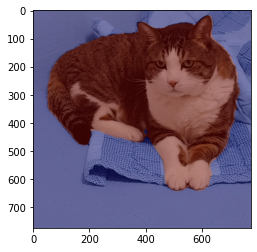

In [243]:
img_show = img_orig.copy()
img_show_2 = img_orig_2.copy()
img_show_3 = img_orig_3.copy()
img_show_4 = img_orig_4.copy()
# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255
img_mask_2 = seg_map_2.astype(np.uint8)*255
img_mask_3 = seg_map_3.astype(np.uint8)*255
img_mask_4 = seg_map_4.astype(np.uint8)*255
# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
color_mask_2 = cv2.applyColorMap(img_mask_2, cv2.COLORMAP_JET)
color_mask_3 = cv2.applyColorMap(img_mask_3, cv2.COLORMAP_JET)
color_mask_4 = cv2.applyColorMap(img_mask_4, cv2.COLORMAP_JET)
# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
img_show_2 = cv2.addWeighted(img_show_2, 0.6, color_mask_2, 0.4, 0.0)
img_show_3 = cv2.addWeighted(img_show_3, 0.6, color_mask_2, 0.4, 0.0)
img_show_4 = cv2.addWeighted(img_show_4, 0.6, color_mask_4, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_show_2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_show_3, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_show_4, cv2.COLOR_BGR2RGB))
plt.show()

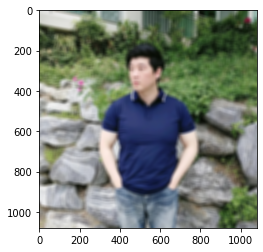

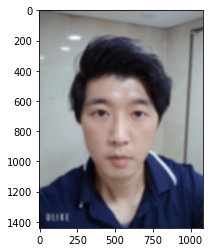

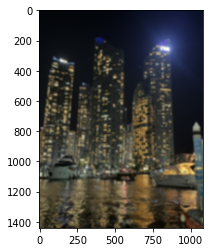

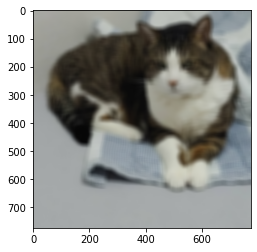

In [244]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (20,20))  
img_orig_blur_2 = cv2.blur(img_orig_2, (20,20))
img_orig_blur_3 = cv2.blur(img_orig_3, (15,15))
img_orig_blur_4 = cv2.blur(img_orig_4, (20,20))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig_blur_2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig_blur_3, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig_blur_4, cv2.COLOR_BGR2RGB))
plt.show()

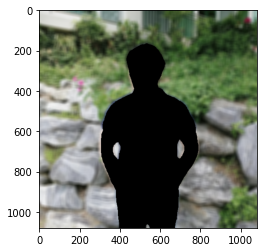

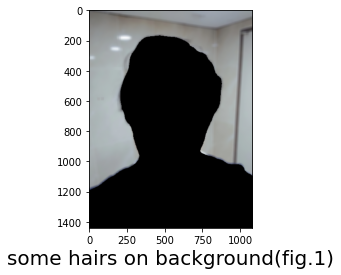

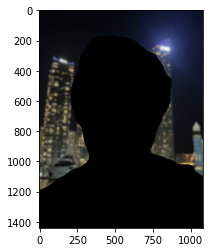

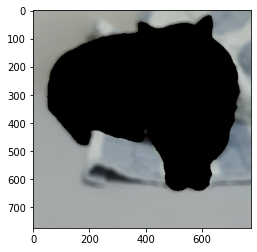

In [245]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_mask_color_2 = cv2.cvtColor(img_mask_2, cv2.COLOR_GRAY2BGR)
img_mask_color_3 = cv2.cvtColor(img_mask_2, cv2.COLOR_GRAY2BGR)
img_mask_color_4 = cv2.cvtColor(img_mask_4, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_mask_2 = cv2.bitwise_not(img_mask_color_2)
img_bg_mask_3 = cv2.bitwise_not(img_mask_color_3)
img_bg_mask_4 = cv2.bitwise_not(img_mask_color_4)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
img_bg_blur_2 = cv2.bitwise_and(img_orig_blur_2, img_bg_mask_2)
img_bg_blur_3 = cv2.bitwise_and(img_orig_blur_3, img_bg_mask_3)
img_bg_blur_4 = cv2.bitwise_and(img_orig_blur_4, img_bg_mask_4)

plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_bg_blur_2, cv2.COLOR_BGR2RGB))
plt.xlabel("some hairs on background(fig.1)",fontsize=20)
plt.show()
plt.imshow(cv2.cvtColor(img_bg_blur_3, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_bg_blur_4, cv2.COLOR_BGR2RGB))
plt.show()

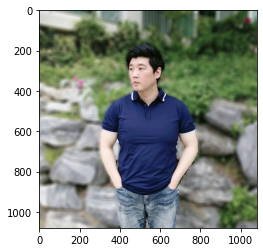

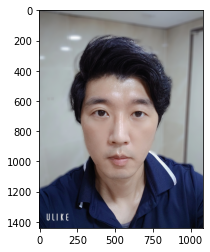

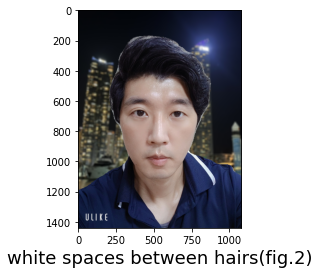

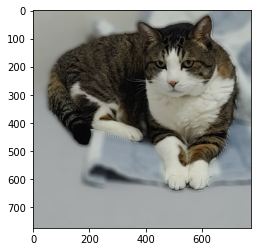

In [246]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
img_concat_2 = np.where(img_mask_color_2==255, img_orig_2, img_bg_blur_2)
img_concat_3 = np.where(img_mask_color_3==255, img_orig_2, img_orig_blur_3)
img_concat_4 = np.where(img_mask_color_4==255, img_orig_4, img_bg_blur_4)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_concat_2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_concat_3, cv2.COLOR_BGR2RGB))
plt.xlabel('white spaces between hairs(fig.2)',fontsize=18)
plt.show()
plt.imshow(cv2.cvtColor(img_concat_4, cv2.COLOR_BGR2RGB))
plt.show()

### 이미지의 배경 흐리게 하기에서 문제점
* 흐린 배경부분과 인물의 경계가 약간 모호한 경우가 있다.    
* 인물의 얼굴색과 배경 색이 비슷하면 배경흐림의 효과가 경감된다.  
* 얼굴이 크게 나온 사진에서도 머리카락이 신체의 일부인데 배경의 일부인 것처럼  
  나왔다. (fig.1)
* 최종적으로 다른 배경으로 재합성한 사진에서도 머리카락 사이사이의 이전   
  배경을 완전히 제거하지 못함. (fig.2)

### 해결책
* 카메라의 조리개를 크게 하여 더 많은 빛이 들어오게 함으로써 초점거리를 줄인다.
* 카메라의 줌 기능을 이용하여 피사체와의 거리를 좁힌다.
* 카메라 렌즈의 굴절률을 조절하여 초첨거리를 좁힌다. (스넬의 법칙)
* 조리개를 수동으로 조절하여 피사체와 배경과의 차이가 있을 때를 찾는다.
* 신체의 같은 색(예를 들어 머리카락(검은색))을 똑같이 인식할 수 있는 훈련된 모델을 개발한다.
* 신체와 배경의 경계에서의 픽셀 차이를 더욱 극명히 할 수 있는 이미지 분류기를 개발한다.
* 3D 이미지 센서 기술 : 양안시각화, 구조광 기술, 비행시간 방식(ToF)